Initial setup

In [1]:
%run "Common setup.ipynb"

C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
c:\programs\owncloud\projects\wosis\wosis\query.py:49: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  wos_config = yaml.load(config)


In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

In [3]:
corpora_df.to_csv('{}/corpora_rest.csv'.format(DATA_DIR))

Keyword match OAT in the Filtered Corpora and then plot keyword and publication trend of resutls.

In [4]:
oat = wosis.keyword_matches(RC, ['local sensitivity', 'oat', 'one-at-a-time', 'one-factor-at-a-time'], threshold=95.0)

In [5]:
all_oat = oat.combine_recs()

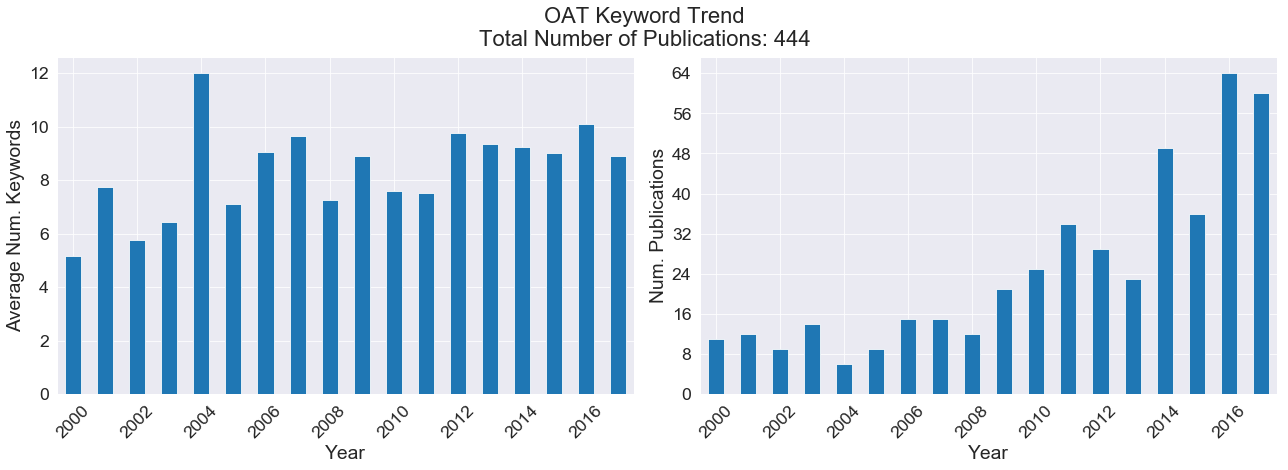

In [6]:
wos_plot.plot_kw_trend(all_oat, title='OAT Keyword Trend')

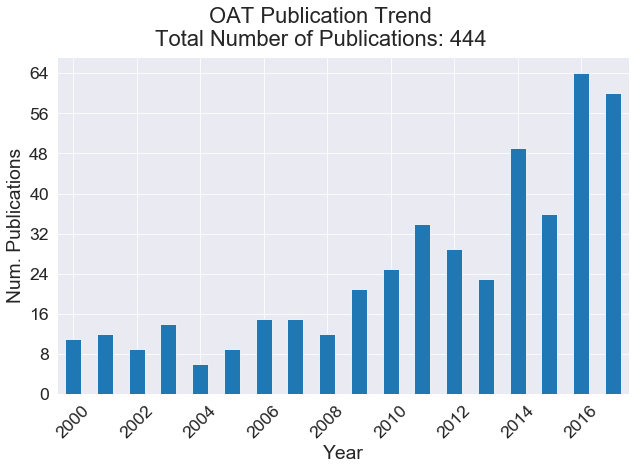

In [7]:
wos_plot.plot_pub_trend(all_oat, title='OAT Publication Trend')

<hr> Running a key-phrase extraction on OAT to identify the fields using this method.

In [8]:
oat_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_oat))

In [9]:
oat_phrases.display_phrases()

Mathematical Model of Dynamic Behavior of Microbial Desalination Cells for Simultaneous Wastewater Treatment and Water Desalination (2014) 
https://dx.doi.org/10.1021/es504089x 

mL.min(-), and to be operated with an external resistor less than  O. 

It could fit current generation fairly well and simulate the change of salt concentration. 

Local sensitivity analysis was employed to select model parameters that needed to be re-estimated from the previous studies. 

This model was validated by experimental data from both a bench- and a large-scale MDC system. 


Irrigation water demand of selected agricultural crops in Germany between 1902 and 2010 (2016) 
https://dx.doi.org/10.1016/j.scitotenv.2016.06.206 

K/yr and an increase in precipitation of  mm/yr. 

Climatic conditions in Germany continued to change over the investigation period, with an increase in temperature of . 

The IWD for the investigated crops in the area of the current "Federal Republic of Germany" over the  years wa

Effects of millipedes and earthworms on the decomposition of N--labelled litter of winter oilseed rape were investigated in a microcosm field experiment over a period of  days on an oat field near Gottingen managed by integrated farming. 

The effects were most pronounced in the presence of Aporrectodea caliginosa. 

The total amount of nitrate, ammonium and the amount of N- leached from the microcosms was increased in the presence of earthworms or of both earthworms and millipedes, Both species proved to be important members of the detritus food web of the agricultural system studied. 

A total of  microcosms were filled with defaunated soil. 

To the microcosms nine adult individuals of Blaniulus guttulatus (Diplopoda) and two of Aporrectodea caliginosa (Lumbricidae) were added separately or in combination. 


Wastewater management integrated with farming - an environmental systems analysis of a Swedish country town (2006) 
https://dx.doi.org/10.1016/j.resconrec.2005.12.003 

The obj

In this study, we presented an efficient global methodology of sensitivity analysis and parameter estimation for a physically-based agro-hydrological model (SWAP-EPIC). 


Living cover crops have immediate impacts on soil microbial community structure and function (2017) 
https://dx.doi.org/10.2489/jswc.72.4.361 

This study examined the effects of eight fall-sown cover crop species grown singly and in multispecies mixtures on microbial community structure and soil biological activity using phospholipid fatty acid (PLFA) profiles and daily respiration rates, respectively. 

Fourteen cover crop treatments and a no cover crop control were established in August of  and  on adjacent fields in central Pennsylvania following spring oats (Avena saliva L.). 

This discovery paves the way for intentional management of the soil microbiome to enhance soil health through cover crop selection. 

This research establishes a clear link between cover crops, microbial communities, and soil health. 

In


Predicting the Long-Term Performance of a Structural Best Management Practice with the BMP ToolBox Model (2010) 
https://dx.doi.org/10.1089/ees.2009.0105 

The study applied the BMP ToolBox model to a BMP site in Taiwan to test its validity. 

Furthermore, the one-factor-at-a-time method (OFAT) was applied in a sensitivity analysis to identify sensitive model parameters. 

It is costly to constantly sample to monitor the performance of a structural best management practice (BMP). 

The BMP ToolBox model was calibrated and verified using two years of sample data. 

The BMP Toolbox model was successfully applied, and a process for evaluating the long-term operation of structural BMP sites was established. 


Growth promotion of spinach by fluorescent Pseudomonas strains under application of organic materials (2005) 
https://dx.doi.org/10.1111/j.1747-0765.2005.tb00119.x 

The organic materials (cattle feces compost (with rice straw), horse feces compost (with sawdust), Japanese pampas gr

Flexible environments for model building are available, but need to be assisted by proper diagnostic tools for model structure selection. 


Exact Sensitivity Equation for One-Dimensional Steady-State Shallow Water Flow (Application to Model Calibration) (2010) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0000272 

For this, the sensitivity of the water depth to the friction coefficient is analytically derived for one-dimensional steady flow conditions in a wide rectangular channel. 

This characteristic distance allows % of the maximum possible variation in the sensitivity of the water depth to the friction coefficient to be captured. 

This length locates downstream of the stage measurement point in subcritical flow regime and upstream in supercritical flow regime. 

Generally, friction coefficient is used as a calibration parameter for steady-state one-dimensional shallow water flow models. 

In this study, the local sensitivity analysis is used to derive a general rule for calibr

The result of this analysis drives the ABC algorithm towards significant dimensions of the search space to improve the discovery of the global optimum. 


Trends in sensitivity analysis practice in the last decade (2016) 
https://dx.doi.org/10.1016/j.scitotenv.2016.02.133 

The results above are confirmed when zooming on the sole articles published in chemical modelling, a field historically proficient in the use of SA methods. 

(C)  The Authors. 

Even if OAT is still the most largely used technique in SA, there is a clear increase in the use of GSA with preference respectively for regression and variance-based techniques. 

Data about regions of origin and discipline are also briefly discussed. 

Even after adjusting for the growth of publications in the sole modelling field, to which SA and GSA normally apply, the trend is confirmed. 


Plastic litter in sediments from the Croatian marine protected area of the natural park of Telascica bay (Adriatic Sea) (2017) 
https://dx.doi.org/

Advantages of this approach are that no atmospheric correction is needed and that atmospheric, adjacency, topography, and surface directional effects can be directly and more accurately included in the forward modelling. 


ESTIMATING SEDIMENT DELIVERY RATIOS FOR GRASSED WATERWAYS USING WEPP (2017) 
https://dx.doi.org/10.1002/ldr.2727 

The SDRs can be used to estimate sediment yield, which is an essential element for making land management decisions but is rarely measured. 

Manning's roughness coefficient was the most significant parameter for predicting SDR for both the terraced and non-terraced watersheds. 

Water Erosion Prediction Project was calibrated and validated for runoff and sediment yield for large .-ha and smaller .-ha nested watersheds with terraces and a common GWW outlet. 

The equations developed here can be used to estimate SDRs for watersheds that are drained via GWWs having similar physical characteristics: slope (-%), Mannings's roughness coefficient (.-. 

Water

This should not to be read as a lack of validity of the method, but it shows that any sensitivity method cannot be automated in a form that runs without expert guidance on the ranges. 

Different assumptions with regard to the interval of the inputs used for screeing led to different conclusions, especially with regard to the importance of quit and relapse rates versus initial prevalence rates. 

State-transition models are employed to project future prevalence rates of risk factors and diseases within populations. 


Parameter and rating curve uncertainty propagation analysis of the SWAT model for two small Mediterranean catchments (2013) 
https://dx.doi.org/10.1080/02626667.2013.837222 

To efficiently compare the different uncertainty methods and the effect of the uncertainty of the rating curve on model prediction uncertainty, common criteria were set for the likelihood function, the threshold value and the number of simulations. 

Subsequent sensitive parameter calibration and SWA

After evaluation with environmental water samples from different areas, swine-targeted assays based on two Bacteroidales-like GFE sequences appear to be suitable quantitative tracing tools for swine fecal pollution. 

To enrich for swine-specific DNA fragments, swine fecal DNA composite (n = ) was challenged against a DNA composite consisting of cow, human, goat, sheep, chicken, duck and goose fecal DNA extracts (n = ). 


Sensitivity analysis of conceptual model calibration to initialisation bias. Application to karst spring discharge models (2012) 
https://dx.doi.org/10.1016/j.advwatres.2012.03.020 

In this paper the perturbation approach is used to investigate the analytical properties of the sensitivity to the initial conditions on the calibration and simulation results of two karst spring discharge reservoir models. 

When associated with long-term memory reservoir and fast discharge models, they may generate a substantial initialisation bias even after very long periods of inact

Global sensitivity of structural variability by random sampling (2010) 
https://dx.doi.org/10.1016/j.cpc.2010.08.007 

These upper bounds, introduced by Sobol', are based on the integration of the classical (local) gradient sensitivity analysis within the whole parameter space of the inputs. 

Hence, in this work the idea is to repeat the estimation of the local sensitivity analysis adopting a very efficient Monte Carlo procedure, along the points generated from Markov-chains. 

This paper presents an efficient sampling-based algorithm for the estimation of the upper bounds of the total sensitivity indices. 

Presented numerical examples prove the efficiency and the applicability of the proposed approach. 


Effect of plant growth-promoting bacteria (PGPR) and arbuscular mycorrhizal fungi (AMF) inoculation on oats in saline-alkali soil contaminated by petroleum to enhance phytoremediation (2015) 
https://dx.doi.org/10.1007/s11356-014-3396-4 

Plant biomass, physiological parameters in 

This paper presents the analysis of VOC measurements collected indoors and outdoors for  students' homes in NYC and for  students' homes in LA across two seasons. 

Formaldehyde had substantially higher indoor emission rates in the summer in NYC compared to winter (. 

h(-) in LA in the fall. 

mg/h), ,-dichlorobenzene ( mg/h), formaldehyde ( mg/h), acetaldehyde ( mg/h), benzaldehyde (. 


Evaluating biophysical variables to identify suitable areas for oat in Central Mexico: a multi-criteria and GIS approach (2003) 
https://dx.doi.org/10.1016/S0167-8809(02)00180-9 

Evaluation of biophysical variables is usually a first step in land use analysis. 

Fuzzy membership function was used to generate standardized factor maps. 

This research provided information at regional level that could be used by farmers to select crop pattern and suitability. 

According to the weight-eigen vectors, the results indicated that the most important variables affecting the growth of an oat crop were precipi

ac(-) yr(-)) on a field under reduced tillage. 

The opportunity value of the lost nutrients for the  ha ( ac) subwatershed averaged about C$. 

Assessment of STC manure-applied data on an annual basis shows that the hauling and application of hog manure from  to  was generally more expensive than the nutrient value of the manure; however, in recent years, due to the increase in the value of commercial nutrients, the nutrient value of hog manure exceeds the cost. 

For the entire STC Watershed, the export of nutrients represented a loss of opportunity of C$. 

For the STC Watershed, applied N did not affect N export. 


Nitrous oxide emissions and nitrate leaching in an arable rotation resulting from the presence of an intercrop (2011) 
https://dx.doi.org/10.1016/j.agee.2011.02.025 

The leguminous intercrops increased the soil available-N during the first growing season and in the subsequent crop. 

Nitrous oxide losses were significantly different between the treatments and especiall

Susceptibility of cover crop plants to Fusarium virguliforme, causal agent of soybean sudden death syndrome, and Heterodera glycines, the soybean cyst nematode (2017) 
https://dx.doi.org/10.2489/jswc.72.6.575 

There were very few (zero to five) SCN females on the roots of multiple varieties of leguminous cover crop species studied. 

), and wheat (Triticum aestivum L.), and Fv DNA quantity in the roots of these species was lower than in soybean. 

None of the cover crop plants studied were susceptible hosts for SCN. 

are nonhosts or poor hosts. 

No females were recovered from the roots of any of the nonleguminous species studied, except for a single female on four plants from three different species. 


Simulation of carbon dioxide injection at the FutureGen2.0 site: Class VI permit model and local sensitivity analysis (2016) 
https://dx.doi.org/10.1016/j.ijggc.2016.10.009 

The three most sensitive inputs for injectivity are the horizontal permeability and the residual aqueous satu

Implication of zinc excess on soil health (2016) 
https://dx.doi.org/10.1080/10934529.2015.1128726 

The growth of oat and white mustard plants was almost completely inhibited in response to the highest zinc doses of , and ,mg Zn+ kg(-). 

The experimental variables were: zinc applied to soil at six doses: , , , ,, , and ,mg of Zn+ kg(-) in the form of ZnCl (zinc chloride), and species of plant: oat (Avena sativa L.) cv. 

This study was undertaken to evaluate zinc's influence on the resistance of organotrophic bacteria, actinomyces, fungi, dehydrogenases, catalase and urease. 

Soil without the addition of zinc served as the control. 

Zinc also exerted an adverse influence on the physicochemical properties of soil and plant development. 


Numerical analysis of water and solute transport in variably-saturated fractured clayey till (2009) 
https://dx.doi.org/10.1016/j.jconhyd.2008.09.001 

The model could reproduce reasonably well the observed preferential migration of AY and SB throu

The quantity of corn straw ash collected from deposition probe was noticeably lower than that of oat straw and rice straw due to different contents of K, S, and Si in fuels. 

The results indicated that the ash forming processes of straw were influenced by fuel composition and temperature. 

The main objective of this study was to determine ash transformation and deposition characteristic for three types of straw (corn straw, oat straw, and rice straw) combustion at temperatures between  and  degrees C. The collected deposits on the sampling probe were characterized with X-ray diffraction and scanning electron microscopy combined with energy dispersive X-ray analysis. 


Simulating dam-breach flood scenarios of the Tangjiashan landslide dam induced by the Wenchuan Earthquake (2012) 
https://dx.doi.org/10.5194/nhess-12-3031-2012 

Wenchuan earthquake had impounded the largest lake in the earthquake affected area with an estimated volume of x() m(), and the potential catastrophic dam bre

Modeling the Quality and Quantity of Runoff in a Highly Urbanized Catchment Using Storm Water Management Model (2016) 
https://dx.doi.org/10.15244/pjoes/60721 

The calibration and verification results indicated that the model structure and parameters fitted the runoff-producing pattern. 

The total simulation accuracies of TSS, TN, TP, and COD loads, as assessed by the R- value, were ., ., ., and ., respectively. 

The modified Morris screening method was used for local sensitivity analysis. 

Road exponent was the most sensitive parameter in determining TSS quantity and peak concentration. 


Uncertainty analysis along the ecological quality status of water bodies: The response of the Posidonia oceanica multivariate index (POMI) in three Mediterranean regions (2012) 
https://dx.doi.org/10.1016/j.marpolbul.2012.03.007 

When water bodies classified in good/high quality were separated from those in moderate/poor status classes, we found that the latter displayed higher levels of uncert

Each node represents a pore network, the permeability of which is chosen randomly from a density distribution function. 

The inlet pressure is adjusted to keep the total flow rate of injected fluid constant. 

A dynamic and large-scale network simulator was developed to simulate the rate-controlled immiscible displacement of two fluids in long, undisturbed soil columns. 

The capillary pressure and relative permeability functions are obtained from either the quasistatic simulation of the displacement of water by oil in a pore-and-throat network or the inverse modeling of soil column flow tests by using the approximate multiflowpath model (MFPM). 

When the microheterogeneity at the pore network scale of nodes strengthens, the flow of oil through preferential pathways is enhanced, and the upscaled water and oil relative permeabilities change drastically. 


Ceric ion-induced synthesis of polymethyl methacrylate-grafted oatmeal: its characterizations and applications (2016) 
https://dx.

However, quantitative analysis of crop structure adjustment is a difficult process. 

This study proposes an effective evaluation method for crop structure adjustment that combines vulnerability and contribution rate assessment. 

Crop structure adjustment is a primary strategy to effectively respond to climate change and maximize climatic resources. 


Sensitivity analysis of SAR estimators: a numerical approximation (2012) 
https://dx.doi.org/10.1080/00949655.2012.656369 

The results are encouraging and can be used for further developments like quick diagnostic tools to explore the sensitivity of spatial estimators with respect to the size of the spatial correlation. 

Using matrix derivatives we calculate the Taylor approximation of the LS estimator in the SAR model up to the second order. 

The simulation results show significant computation time reductions and a good approximation behaviour of the SAR LS estimator in the neighborhood of rho = , when using a non-spatial LS estimat

Root and shoot Cu concentrations decreased or changed insignificantly in most BC treatments. 

The results show that the BCs decreased bioavailable Cu, decreased Cu uptake by O. picensis, improved habitat for microorganisms, and enhanced plant growth in Cu-contaminated soil. 


Establishing Native Perennial Bioenergy Crops with Cereal Grain Companion Crops (2015) 
https://dx.doi.org/10.1007/s12155-014-9498-5 

No individual companion crop/bioenergy crop combination consistently yielded more perennial biomass or less weed biomass compared to unweeded controls across all environments; however, companion crops can supply marketable grain and biomass during the seeding year when planted with native perennial grasslands without decreasing perennial biomass yields in subsequent harvest years. 

Harvestable forage yields were greater for the oat companion crop compared to Canada wildrye during the seeding year at two environments, which could make the cereal grain companion crops more profita

Metal phytoextraction processes remove soil contaminants through plant absorption; however, plants display different responses to the metal contamination of the soil. 

Finally, we suggest that "IAPAR " black oat cultivar is efficient Cd, Cr, and Pb accumulators. 

The presence of foods contaminated with heavy metals in the human diet can cause health damages. 


Evaluation of chemical parameters and ecotoxicity of a soil developed on gossan following application of polyacrylates and growth of Spergularia purpurea (2013) 
https://dx.doi.org/10.1016/j.scitotenv.2013.05.003 

However, this was not sufficient to ensure the growth of a large number of shrubs despite a great germination rate. 

The aim of this study was to evaluate the chemical characteristics and ecotoxicity of a mine soil developed on gossan materials and amended with hydrophilic polyacrylate polymers after a growth cycle of Spergularia purpurea. 

The soil had high total concentrations (g/kg) of Al (.-. 

Although the st

The sensitivity of some key concentrations is computed with respect to some input parameters (kinetic rates, microphysical parameters). 

A sensitivity analysis of an atmospheric multiphase mechanism is performed using an automatic differentiation tool. 


Colony-specific investigations reveal highly variable responses among individual corals to ocean acidification and warming (2015) 
https://dx.doi.org/10.1016/j.marenvres.2015.05.004 

Indeed, the pooled data obscured actual responses of individual colonies or presented a response that was not observed in any individual. 

Along with intercolonial responses, responses of individual colonies versus pooled data to the treatments were investigated. 

The main results were: ) responses to either OA or T or their combination were different between individual colonies when considering physiological functions; ) tolerance to either OA or T was not synonymous with tolerance to the other parameter; ) tolerance to both OA and T did not necessar

For a continuous operation, a two-unit system could be configured to allow for one week germination and one week cleaning and startup in one unit while the other unit is in operation. 


Investigation of Ant System parameter interactions by using design of experiments for job-shop scheduling problems (2009) 
https://dx.doi.org/10.1016/j.cie.2007.06.001 

Improving the quality of the solution or the solution time is basic research area on metaheuristics. 

Modifications of the existing ones or creation of hybrid approaches are the focus of these efforts. 

Another area of improving the solution quality of metaheuristics is finding the optimal combination of algorithm control parameters. 

Referring to the statistical analysis it is observed that none of the interactions between the Ant System parameters has a significant effect on makespan value. 

The effects and interactions of the parameters have been interpreted with the outputs of the experiments. 


Modeling the performance of lar

These data may imply that enzymatic synthesis of proline was strongly damaged by the metal ions. 


Biomass and chemical amendments for enhanced phytoremediation of mixed contaminated soils (2015) 
https://dx.doi.org/10.1016/j.ecoleng.2015.09.029 

The results suggest that biochar and compost amendments can improve the plant growth characteristics and enhance phytoremediation of mixed contaminated soils. 

The results showed that the biochar and compost amendments improved the growth characteristics and biomass of the plants. 

Average maximum plant height of sunflower in contaminated soil was increased by % with the addition of compost. 

Polycyclic aromatic hydrocarbon (PAH) degradation improved in the presence of all of the amendments studied. 

Pot experiments were conducted to investigate the impact of biomass amendments (biochar, compost and nutrient solution) and chemical amendments (Ethylenediaminetetraacetic acid (EDTA) and Igepal CA-) on the phytoremediation of soil co-contam

The external loads can induce the extreme air gap response and potential deck impact to the semi-submersible platform. 

Three mooring systems and five simulation cases about the presented platform are simulated based on the results of wind tunnel tests and sea-keeping tests. 

According to the tuned numerical model, sensitivity analysis studies of air gap motion with respect to the mooring system and wind load are performed in time domain. 


Bicultures of oat (Avena sativa L.) and grazing vetch (Vicia dasycarpa L.) cover crops increase contents of carbon pools and activities of selected enzymes in a loam soil under warm temperate conditions (2016) 
https://dx.doi.org/10.1080/00380768.2016.1206833 

This study evaluated effects of oats (Avena sativa L.) and grazing vetch (Vicia dasycarpa L.), bicultures, in rotation with summer maize (Zea mays), on soil organic matter fractions and activities of selected enzymes. 

Increasing proportions of vetch resulted in increases in urease and be

Interactions between input parameters were found limited with a maximum contribution to variance of less than .% for daily frequency and less than .% for the monthly frequency. 

The overall uncertainty ranged from % (BREB method) to % (mass transfer method) of the mean evaporation rate. 

State dependent parameter models were used to estimate the sensitivity indices of the different evaporation estimation methods at daily and monthly frequencies. 


Long-term amendment of urban and animal wastes equivalent to more than 100 years of application had minimal effect on plant uptake of potentially toxic elements (2016) 
https://dx.doi.org/10.1016/j.agee.2016.06.019 

In the present study we investigated the effect of the different animal and urban waste treatments in CRUCIAL on oat yield after ten years of experimentation on concentrations of heavy metals in oat grain harvested in the field and pea plants grown in a pot trial using soil from the CRUCIAL field trial. 

In conclusion, our da

Plant-Available and Water-Soluble Phosphorus in Soils Amended with Separated Manure Solids (2012) 
https://dx.doi.org/10.2134/jeq2011.0290 

Physical, chemical, or biological treatment of animal liquid manure generally produces a dry-matter rich fraction (DMF) that contains most of the initial phosphorus (P). 

Soil P-WT at the : ratio was lower with anaerobically digested LSM. 

Aft er  d of plant growth, DMFs produced yields comparable to mineral P fertilizer. 

Soil water-extractable P (P-WT) at all water: soil extraction ratios (:, :, and :) was slightly higher when DMFs were derived from LDC rather than LSM. 

Our objective was to assess the solubility and plant availability of P from various DMFs as a function of soil P status. 


Geochemical Parameters and Reductive Dechlorination Determine Aerobic Cometabolic vs Aerobic Metabolic Vinyl Chloride Biodegradation at Oxic/Anoxic Interface of Hyporheic Zones (2017) 
https://dx.doi.org/10.1021/acs.est.6b05041 

Contrastingly, VC was m

Soil water NO--N sample data showed a unimodal distribution, through the first two months of the split field rotations, that changed to a distinct bimodal distribution three months into the rotations. 

This monitoring study was conducted to evaluate potential beneficial impacts of a USDA recommended crop rotation on subsurface NO--N concentrations at a . 

Soil water NO--N concentrations were monitored for an alfalfa-oat-bean rotation and an alfalfa-bean-bean rotation in the Idaho Snake River Plain as part of the USEPA Section  National Monitoring Program. 

SGS results suggested that elevated concentrations of NO--N in the soil water were related to both stratigraphic factors as well as the rotational split. 

The median soil water NO--N value calculated from the sample data was approximately mgL(-) greater in the field half planted in beans as compared to the field half planted in oats. 


REFINED LATINIZED STRATIFIED SAMPLING: A ROBUST SEQUENTIAL SAMPLE SIZE EXTENSION METHODOLOGY F

Two gradient-based design optimization algorithms are utilized to improve the reactor performance. 

In this study, the catalytic partial oxidation of methane is numerically investigated using an unstructured, implicit, fully coupled finite volume approach. 


Sensitivity analysis of related parameters in simulation of land subsidence and ground fissures caused by groundwater exploitation (2016) 
https://dx.doi.org/10.1007/s10064-016-0897-z 

These five parameters are thus of major concern in the simulation of land subsidence and ground fissures. 

To investigate the degree of influence of these parameters on calculation of models of land subsidence and ground fissures, Morris' global sensitivity analysis, combined with local sensitivity analysis, was applied. 

Hydraulic and mechanical parameters are very important in the calculation of models of land subsidence and ground fissures caused by groundwater exploitation. 

Nantong, Jiangsu Province in China, was selected to simulate and c

The influence of two levels of artificial Cd soil contamination ( and  mg Cd kg(-) of soil) on the weight of oat plants, chlorophyll content in leaves, rate of photosynthesis, stomatal conductivity and transpiration rate was researched in a pot experiments with Avena sativa L. Another objective was to detect the effect of cadmium contamination of soil on the content of cadmium in the dry mass of oat panicles, stems, upper green and bottom yellow leaves and roots. 

The highest variance was discovered in treatments with the accompanying SO- anion. 

However, the results obtained by measuring the cadmium content in stems and green leaves were not significant. 

A -fold higher Cd application dose significantly manifested itself by a higher content of Cd in all the analyzed parts of plants, including generative organs. 

While estimating the effect of accompanying anions on the Cd content, significant differences were observed only under the higher level of Cd contamination. 


Local sensi

There were significant tradeoffs in slurry N loss among pathways: annual mean NH-N emission across all treatments was ., ., ., and . 

kg ha(-) and annual mean NO-N leaching across all treatments was ., ., ., and . 


Early activation of plasma membrane H+-ATPase and its relation to drought adaptation in two contrasting oat (Avena sativa L.) genotypes (2010) 
https://dx.doi.org/10.1016/j.envexpbot.2010.02.011 

water supply was withheld to allow soils in pots to dry Our results showed that drought-tolerant "Dingyou" maintained significantly greater RWC and osmotic potential (OP) in roots and leaves, and also had larger root-to-leaf ratios of RWC and OP than drought-sensitive "Bende" along with -day (hying process, suggesting that drought-tolerant cv. 

Significant increase in the activity of PM H+-ATPase was observed at the SWC of about -% MC, without detectable changes in leaf and loot RWC simultaneously This demonstrated that there existed an early-warning response in roots before th

Soil losses in the three systems were moderate (<. 

Mg ha(-) y(-)) except during , in which significant soil losses were recorded in IT and TO due to the scarcity of plant cover (< per cent) that was present throughout the rainy season. 

These results suggest that AV has a higher topsoil degradation effect during the resting year than during the cultivation period. 


Improved sensitivity through Morris extension (2012) 
https://dx.doi.org/10.1016/j.chemolab.2011.10.006 

This specificity is very interesting in terms of time and calculation economy. 


IMPACT OF WATER HYACINTH AND WATER LETTUCE AQUEOUS EXTRACTS ON GROWTH AND GERMINATION OF WHEAT AND ITS ASSOCIATED TROUBLESOME WEEDS (2017) 
https://dx.doi.org/10.15666/aeer/1503_939950 

cm) and wheat (. 

To study the effect of Eichhornia crassipes and Pistia stratiotes on germination of wheat and its weeds, a lab experiment was laid out in Completely Randomized Design with  replications. 

E. crassipes reduced wild oat shoot length w

The aim of this study was to describe the full-scale reactor with a limited set of equations. 

The predicting performance was verified with a goodness-of-fit test and key parameters were determined through a local sensitivity analysis. 

Some parameters with respect to bromate and bacteria showed to be only, but to a large extent, sensitive to their associated concentrations. 

Kinetics were implemented in WEST (R) and simulation results were compared to real data. 

It was demonstrated that the model is able to describe the operation of the full-scale ozone reactor, however, further data collection for model validation is necessary. 


Assessing nickel bioavailability in smelter-contaminated soils (2006) 
https://dx.doi.org/10.1016/j.scitotenv.2005.12.029 

These soils varied in pH from . 

Results from the greenhouse, chemical extraction, and biosensor studies suggested that as the pH of the soil was increased with liming, Ni bioavailability decreased. 

A Ni specific bacteria] bios

We also demonstrate differences in apportionment results between a full and an empirical Bayesian setup, and between a Bayesian and a frequentist optimization approach. 

This OFAT sensitivity analysis reveals that mixing model structural choices and error assumptions can significantly impact upon sediment source apportionment results, with estimated median contributions in this study varying by up to % between model versions. 

Whilst all  models estimate subsurface sources to be the largest contributor of SPM (median similar to %), comparison of apportionment estimates reveal varying degrees of sensitivity to changing priors, inclusion of covariance terms, incorporation of time-variant distributions, and methods of proportion characterization. 


Complexity Reduction and Sensitivity Analysis in Road Probabilistic Safety Assessment Bayesian Network Models (2017) 
https://dx.doi.org/10.1111/mice.12273 

After a quick review of a Bayesian network model, in which special attention is dev

Assessing the significance of wetland restoration scenarios on sediment mitigation plan (2015) 
https://dx.doi.org/10.1016/j.ecoleng.2014.11.031 

Considering environmental and economic issues of wetland restoration scenarios revealed that the . 

The sediment load generated for each subbasin was incorporated in the SUSTAIN model. 

The overall goal of this project is to examine the sediment reduction benefit of wetland implementation scenarios both at subbasin and watershed scales. 

This allows for evaluating sediment reduction capability of wetlands at subbasin level. 

ha wetlands were the most suitable for subbasin and watershed level implementation due to its sediment reduction efficiency and significantly lower cost of installation and maintenance. 


Sugars and enzyme activity in the grass Deschampsia antarctica (2003) 
https://dx.doi.org/10.1017/S0954102003001597 

The mechanism that leads to this high accumulation is unknown. 

This result shows that SPS activity is responsiv

Especially in sensitivity analysis, the closed character of the data is often ignored. 


Sensitivity analysis and stochastic simulations of non-equilibrium plasma flow (2009) 
https://dx.doi.org/10.1002/nme.2582 

We study the parametric uncertainties involved in plasma flows and apply stochastic sensitivity analysis to rank the importance of all inputs to guide large-scale stochastic simulations. 

Two plasma flow examples are presented to demonstrate the capability and efficiency of the stochastic sensitivity analysis. 

The first one is a two-fluid model in a shock tube whereas the second one is a one-fluid/two-temperature model in flow past a cylinder Copyright (C)  John Wiley & Sons, Ltd. 

The objective is to perform systematic stochastic simulations of plasma flows treating only as stochastic processes the inputs with the highest sensitivity index, hence reducing substantially the computational cost. 

Quasi-Monte Carlo and Monte Carlo methods. 


Thermal-treated soil for mercu

Based on the CNOP-P approach, a new approach is applied to explore a relatively sensitive and important parameter combination for soil moisture simulations and predictions. 

These results indicate that simulation and prediction of soil moisture is improved by considering the nonlinear effects of important physical parameter combinations. 

In four study regions, the average extent of improvement (.%) in simulating soil moisture using the new approach based on the CNOP-P is larger than that (.%) using the one-at-a-time (OAT) approach. 

The range of uncertainty for simulated soil moisture was found to be from . 

The CNOP-P approach facilitates calculation of the upper bounds of uncertainty due to parameter errors and investigation of the nonlinear effects of parameter combination on uncertainties in simulation and prediction. 

Daphnia magna was the most sensitive test organism in this study with a  h EC of  mg Cu kg(-) dry wt and  mg Sb kg(-) dry wt in elutriates from sludge cultivat

Uptake and Distribution of Stable Strontium in 26 Cultivars of Three Crop Species: Oats, Wheat, and Barley for Their Potential Use in Phytoremediation (2015) 
https://dx.doi.org/10.1080/15226514.2014.898016 

; the percentage of stable Sr removed from the soil to the shoots at harvest time was more than .% after  days. 

higher than that of wheat; Neimengkeyimai-, a naked oat cultivar, had the highest Sr concentrations. 

At maturity, of four naked oat cultivars, Neimengkeyimai- had the highest Sr content at all measured Sr levels. 

Mean shoot Sr concentration of naked oat and barley at tillering was significantly (P < .) 

Mean enrichment coefficients from soil to shoots ranged from . 


Sensitivity and uncertainty in crop water footprint accounting: a case study for the Yellow River basin (2014) 
https://dx.doi.org/10.5194/hess-18-2219-2014 

This study investigates the sensitivity of and uncertainty in crop water footprint (in m() t-()) estimates related to uncertainties in importa

Dehydrogenases were most resistant to zinc in soil cropped with oat, urease in soil under spring rape and catalase in soil sown with yellow lupine. 

Dehydrogenases and urease were more resistant to the adverse influence of zinc in sandy loam than in loamy sand, contrary to catalase, which was less vulnerable in loamy sand than in sandy loam. 

Samples of soil were tested to determine the activity of dehydrogenases, catalase and urease as well as its physicochemical properties. 

With respect to their sensitivity to zinc, the enzymes were arranged in the following order: dehydrogenases > urease > catalase. 

The experimental variables were: the type of soil (loamy sand and sandy loam), degree of soil pollution with zinc from  to  mg Zn+ kg(-) d.m., and plant species (oat, spring rape and yellow lupine). 


Impact of forest conversion to agriculture on carbon and nitrogen mineralization in subarctic Alaska (2003) 
https://dx.doi.org/10.1023/A:1024976713243 

Our study showed that () C a

The latter is mainly influenced by the activation energies and the inlet temperature. 

The influence of several design parameters on its thermal behaviour and performance is investigated by parametric sensitivity analysis (PSA) using a dimensionless model for an infinite length reactor. 

Reactor temperature sensitivity with respect to ratio of inlet velocities, inlet temperature, ratio of pre-exponential factors, difference in activation energies, and heat effect numbers is investigated. 


Development and application of computer simulation tools for ecological risk assessment (2003) 
https://dx.doi.org/10.1023/B:ENMO.0000004585.85305.3d 

In an effort to evaluate the model, a case study was implemented to characterize the effects on an ecosystem of replacing electroplated chromium coatings with sputtered tantalum at U. S. Army Yuma and Aberdeen Proving Grounds. 

In this paper, an approach is introduced for an ecological risk assessment ( ERA) model that can be modified for site-spe

<hr> Criteria matching OAT results to group by field

In [10]:
hydrology = wosis.keyword_matches(all_oat, 
                                  ['hydrolog', 'watershed', 'catchment', 
                                   'water quality', 'groundwater', 'basin', 
                                   'runoff', 'stormwater'], threshold=95.0)

In [11]:
all_hydro = hydrology.combine_recs()

In [12]:
chem = wosis.keyword_matches(all_oat, ['chem', 'chemical engineering'], threshold=95.0)

In [13]:
all_chem = chem.combine_recs()

In [14]:
climate = wosis.keyword_matches(all_oat, ['climate', 'climate change', 'greenhouse'], threshold=95.0)

In [15]:
all_climate = climate.combine_recs()

In [16]:
mechanics = wosis.keyword_matches(all_oat, ['mechanic', 'mechanical engineering'], threshold=95.0)

In [17]:
all_mech = mechanics.combine_recs()

In [18]:
ecology = wosis.keyword_matches(all_oat, ['ecology', 'forest', 'woodland', 'specie'], threshold=95.0)

In [19]:
all_eco = ecology.combine_recs()

In [20]:
risk = wosis.keyword_matches(all_oat, ['risk assessment', 'risk'], threshold=95.0)

In [21]:
all_risk = risk.combine_recs()

In [22]:
tech = wosis.keyword_matches(all_oat, ['tech'], threshold=95.0)

In [23]:
all_tech = tech.combine_recs()

In [24]:
agriculture = wosis.keyword_matches(all_oat, ['agricultur', 'farm'], threshold=95.0)

In [25]:
all_agri = agriculture.combine_recs()

In [26]:
physics = wosis.keyword_matches(all_oat, ['computational physics', 'physics'], threshold=95.0)

In [27]:
all_physics = physics.combine_recs()

In [28]:
comp_sci = wosis.keyword_matches(all_oat, ['computer science', 'computing'], threshold=95.0)

In [29]:
all_comp_sci = comp_sci.combine_recs()

In [30]:
stats = wosis.keyword_matches(all_oat, ['statistics', 'data analysis'], threshold=95.0)

In [31]:
all_stats = stats.combine_recs()

In [32]:
math_model = wosis.keyword_matches(all_oat, ['mathematical model'], threshold=95.0)

In [33]:
all_math = math_model.combine_recs()

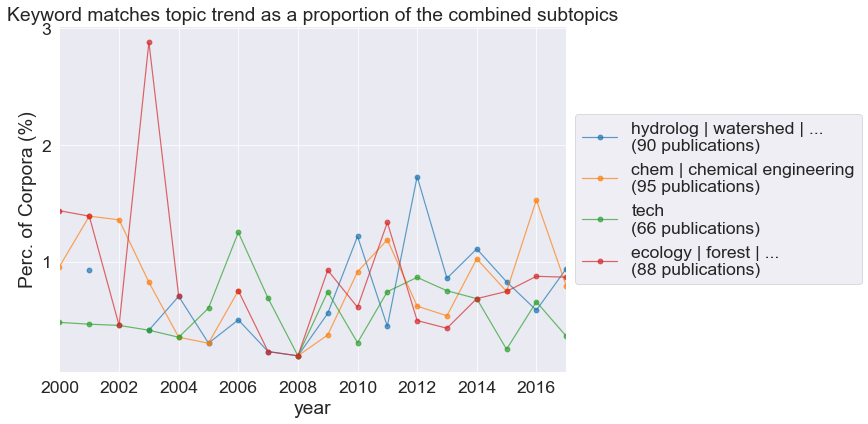

In [34]:
wos_plot.plot_topic_trend([hydrology, chem, tech, ecology], total_rc=RC, 
                          title='Keyword matches topic trend as a proportion of the combined subtopics')

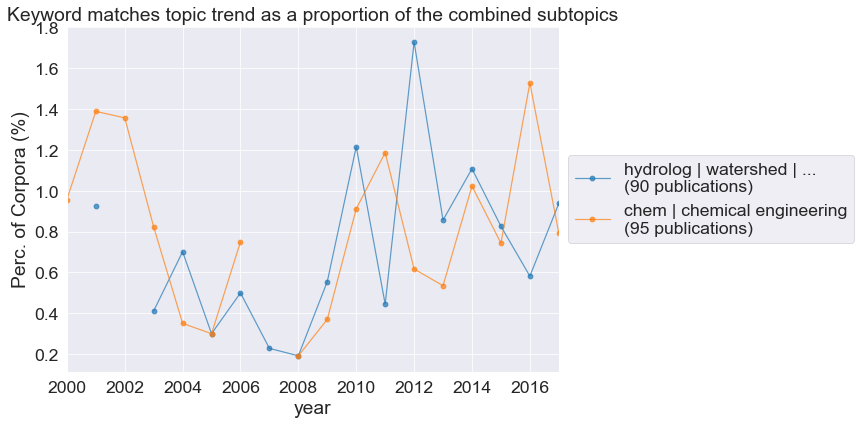

In [35]:
wos_plot.plot_topic_trend([hydrology, chem], total_rc=RC, 
                          title='Keyword matches topic trend as a proportion of the combined subtopics')

<hr> Top-cited journals for OAT

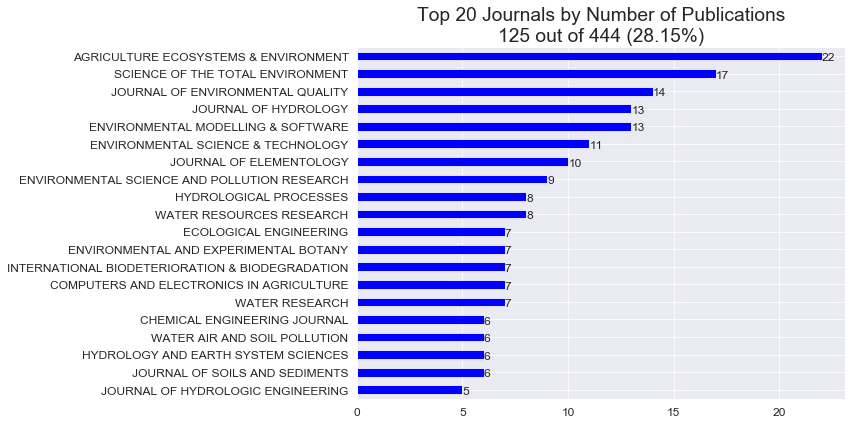

In [36]:
wos_plot.plot_pubs_per_journal(all_oat, top_n=20, annotate=True, show_stats=True)

In [37]:
journals_of_interest_oat = list(map(str.upper, ['Environmental Modelling & Software', 
                            'Computer Methods in Applied Mechanics and Engineering', 
                            'Agriculture Ecosystems & Environment', 'Journal of Hydrology', 
                            'Environmental Science & Technology']))

pubs_for_journals_oat = wosis.find_pubs_by_journal(all_oat, journals_of_interest_oat)

In [38]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_oat = {}
for journal in pubs_for_journals_oat:
    fn = '{}/collection_oat_{}_2019-03-15'.format(TMP_DIR, journal)
    paper_citations_per_journal_oat[journal] = wosis.get_num_citations(pubs_for_journals_oat[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

In [39]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_oat = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_oat.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_oat = collection_oat.append(df[cols_of_interest][0:10], ignore_index=True)

In [40]:
top_cited_in_top_journals_oat = collection_oat.sort_values('citations', ascending=False)
top_cited_in_top_journals_oat.head(10)

,AU,year,title,journal,citations,DOI link
30,"van Griensven, A|Meixner, T|Grunwald, S|Bishop...",2006,A global sensitivity analysis tool for the par...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,579,https://dx.doi.org/10.1016/j.jhydrol.2005.09.008
10,"Saltelli, A|Annoni, P",2010,How to avoid a perfunctory sensitivity analysis,{'local sensitivity'} {'oat'} {'one-at-a-time'...,376,https://dx.doi.org/10.1016/j.envsoft.2010.04.012
11,"Chen, Y|Yu, J|Khan, S",2010,Spatial sensitivity analysis of multi-criteria...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,178,https://dx.doi.org/10.1016/j.envsoft.2010.06.001
31,"Al-Raoush, RI|Willson, CS",2005,Extraction of physically realistic pore networ...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,150,https://dx.doi.org/10.1016/j.jhydrol.2004.05.005
32,"Arabi, M|Govindaraju, RS|Hantush, MM",2007,A probabilistic approach for analysis of uncer...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,114,https://dx.doi.org/10.1016/j.jhydrol.2006.09.012
12,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,77,https://dx.doi.org/10.1016/j.envsoft.2013.09.031
13,"Cheng, V|Steerners, K",2011,Modelling domestic energy consumption at distr...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,76,https://dx.doi.org/10.1016/j.envsoft.2011.04.005
33,"Haddad, K|Rahman, A",2012,Regional flood frequency analysis in eastern A...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,67,https://dx.doi.org/10.1016/j.jhydrol.2012.02.012
0,"Ng, CA|Hungerbuhler, K",2013,Bioconcentration of Perfluorinated Alkyl Acids...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,53,https://dx.doi.org/10.1021/es400981a
14,"Chen, Y|Yu, J|Khan, S",2013,The spatial framework for weight sensitivity a...,{'local sensitivity'} {'oat'} {'one-at-a-time'...,52,https://dx.doi.org/10.1016/j.envsoft.2013.06.010


In [41]:
top_cited_in_top_journals_oat.to_csv('{}/top_cited_oat2_papers.csv'.format(DATA_DIR))

<hr> Topic trend

In [42]:
all_oat.name = 'OAT'

In [43]:
# oat_topics = wosis.find_topics(all_oat, cache_as='{}/oat_topics'.format(TMP_DIR))
# oat_uasa = list(map(oat_topics.get_topic_by_id, [1, 10]))
# model_sensi = oat_uasa[0]
# oat_sensi_RC = wosis.extract_recs(model_sensi.id, RC)
# oat_phrases = wosis.find_phrases(oat_sensi_RC)
# oat_phrases.display_phrases()

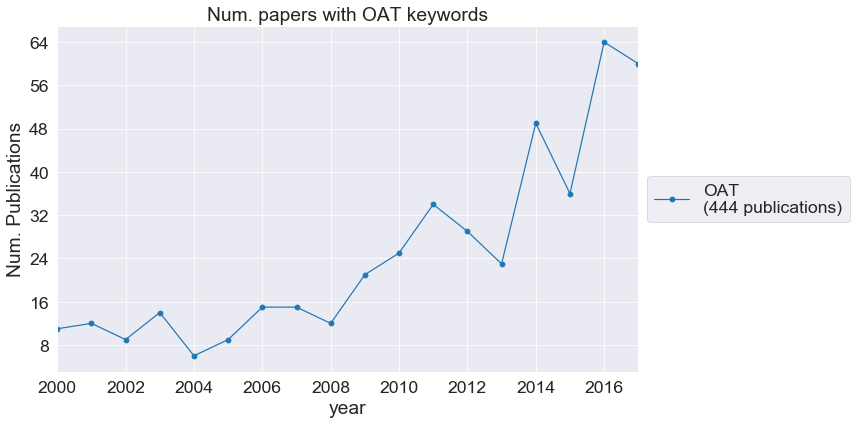

In [44]:
wos_plot.plot_topic_trend([all_oat], title='Num. papers with OAT keywords', 
                          save_plot_fn='{}/Figure_8_a.png'.format(FIG_DIR))

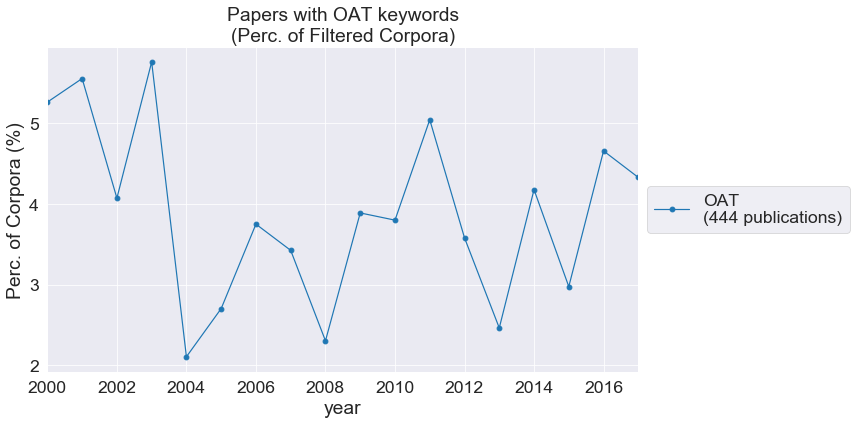

In [45]:
wos_plot.plot_topic_trend([all_oat], total_rc=RC, 
                          title='Papers with OAT keywords\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/Figure_8_b.png'.format(FIG_DIR))

In [46]:
matching_pubs = wosis.find_pubs_by_title(RC, ("How to avoid a perfunctory sensitivity analysis"))
s_and_a_2010_wos_id = wosis.rc_to_df(matching_pubs).id[0]

citing_works = wosis.get_citing_works(s_and_a_2010_wos_id, WOS_CONFIG, cache_as="{}/citing_works".format(TMP_DIR))

matches = wosis.find_keywords(citing_works, ["global sensitivity", "GSA", "sensitivity analysis"])
len(matches)

Authenticated (SID: C5Mhqn5DSDVrYGSvrNK)
Found 376 records


295

In [47]:
# matching_df = wosis.rc_to_df(matches)
matches = citing_works.yearSplit(0, 2017)

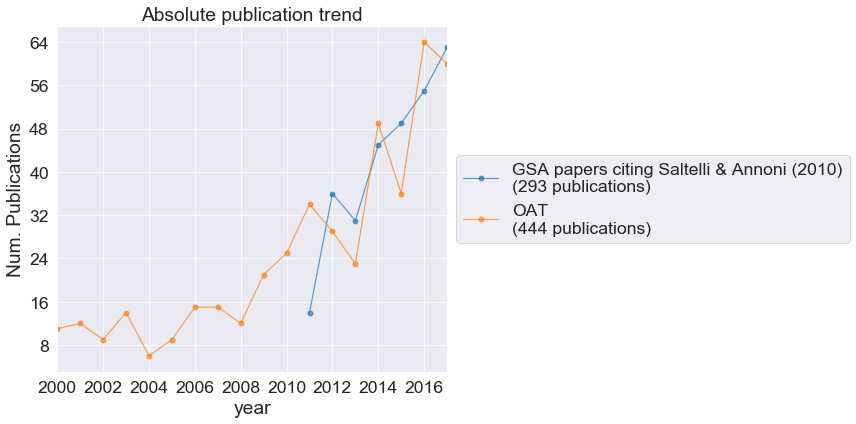

In [56]:
matches.name = 'GSA papers citing Saltelli & Annoni (2010)'
wos_plot.plot_topic_trend([matches, all_oat], title="Absolute publication trend",
                          #total_rc=RC, 
                          save_plot_fn='{}/Figure_sanda_2010_citations.png'.format(FIG_DIR))

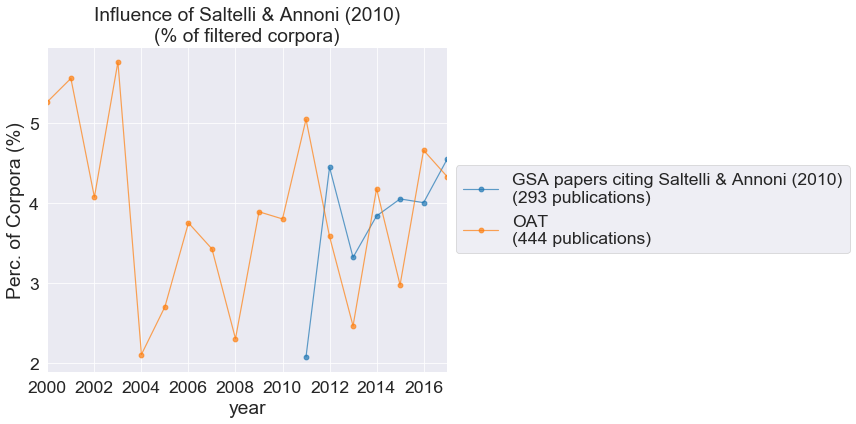

In [58]:
wos_plot.plot_topic_trend([matches, all_oat], title="Influence of Saltelli & Annoni (2010)\n(% of filtered corpora)",
                          total_rc=RC,
                          save_plot_fn='{}/Figure_sanda_2010_citations_proportional.png'.format(FIG_DIR))

In [59]:
sanda_phrases = wosis.find_phrases(matches)

In [60]:
sanda_phrases.all_phrases.to_csv('{}/sanda_phrases.csv'.format(DATA_DIR))

PermissionError: [Errno 13] Permission denied: '../data/sanda_phrases.csv'